In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_data.csv')
df.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


In [3]:
# Split the dataset into features (X) and the target variable (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

## Task 1b
### 1) Creating visualization of data

In [ ]:
import seaborn as sns

# Pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='Results', palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Countplot of Results
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Results', palette='viridis')
plt.title('Countplot of Results')
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

#violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Results', y='Hours_Studied', data=df, palette='coolwarm')
plt.title('Violin Plot of Hours Studied vs Results')
plt.xlabel('Results')
plt.ylabel('Hours Studied')
plt.show()


## Task 1b
### 2) Fitting Model

In [4]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get the model coefficients
coefficients = model.coef_
intercept = model.intercept_


print("Model Coefficients:")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Model Coefficients:
Coefficients: [[1.36499215 1.87733756]]
Intercept: [-4.61182462]


## Task 1b:

### 3) Performance of the model (AUC and ROC) and coefficients of model

Accuracy: 0.93
AUC (Area Under the Curve): 0.98
/n############################ ROC Plot ############################ 


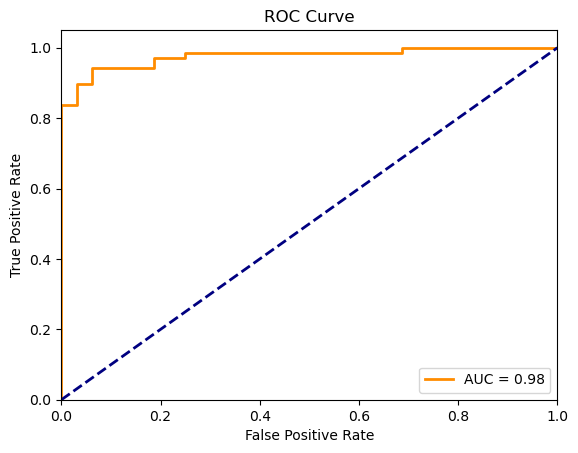

In [13]:

# Make predictions on the same dataset
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate ROC and AUC
y_prob = model.predict_proba(X)[:, 1]  # Probability of class 1
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC (Area Under the Curve): {roc_auc:.2f}")

print("############################ ROC Plot ############################ ")
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Task 2: Understanding and preventing Overfitting in the context of SVM

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modify the code to work with your DataFrame
# Split the dataset into features (X) and the target variable (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (1) Fit an SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Make predictions with the linear kernel SVM
y_pred_linear = linear_svm.predict(X_test)

# Calculate accuracy for the linear kernel SVM
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy of Linear Kernel SVM:", accuracy_linear)


##########################################################################################################



# (2) Fit an SVM model with an RBF kernel and perform grid search for the best gamma
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
rbf_svm = SVC(kernel='rbf')
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5)  # 5-fold cross-validation

grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_c = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']


# Fit an RBF kernel SVM with the best hyperparameters
best_rbf_svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
best_rbf_svm.fit(X_train, y_train)

# Make predictions with the RBF kernel SVM
y_pred_rbf = best_rbf_svm.predict(X_test)

# Calculate accuracy for the RBF kernel SVM
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Best C:", best_c)
print("Best Gamma:", best_gamma)
print("Accuracy of RBF Kernel SVM:", accuracy_rbf)


Accuracy of Linear Kernel SVM: 0.85
Best C: 1
Best Gamma: 1
Accuracy of RBF Kernel SVM: 0.85


## Ploting the SVM Decision boundary

C:\Users\Sai_iluru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Sai_iluru\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Blue Region is Fail
Orange Region is Pass


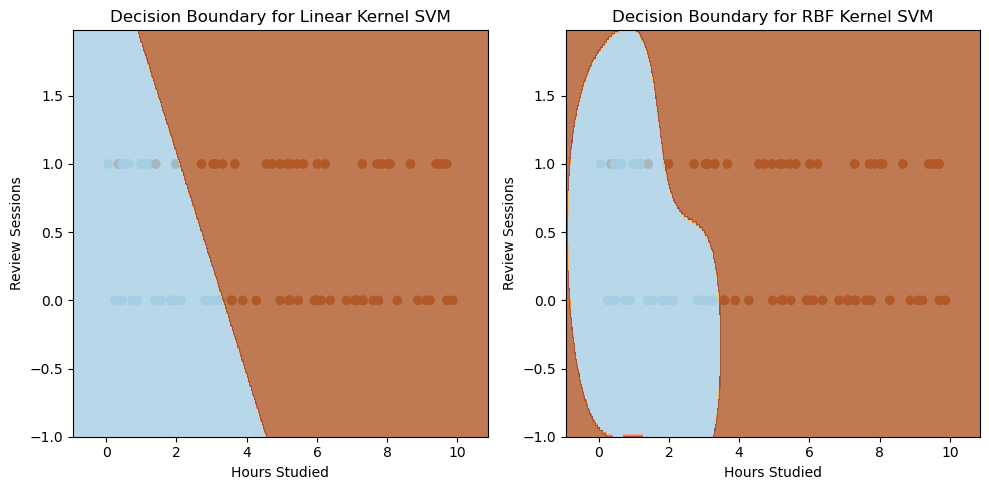

In [17]:
import matplotlib.pyplot as plt

# (1) Decision Boundary Plot for Linear Kernel SVM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Scatter plot the training data
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired)

# Create a mesh to plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the decision boundary
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel('Hours Studied')
plt.ylabel('Review Sessions')
plt.title('Decision Boundary for Linear Kernel SVM')

# (2) Decision Boundary Plot for RBF Kernel SVM
plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired)

# Create a mesh to plot decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the decision boundary
Z = best_rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel('Hours Studied')
plt.ylabel('Review Sessions')
plt.title('Decision Boundary for RBF Kernel SVM')
print("Blue Region is Fail")
print("Orange Region is Pass")
plt.tight_layout()
plt.show()